___
# Ciência dos Dados - PROJETO 1

## Ester dos Santos Quintino
___

# Levantamento socioeconômico das regiões brasileiras e a utilização de tecnologia para acesso à Internet e posse de telefone móvel celular para uso pessoal dos idosos.

___
## Introdução
Este projeto pretende analisar a inclusão digital dos idosos a partir de um levantamento da evolução ou não do uso da tecnologia para o acesso à Internet e posse de telefone móvel celular pessoal, entre os anos de 2011 e 2015. Para tanto, será realizado uma pesquisa socieconômica nas regiões rurais e urbanas do Brasil, a fim de levantar dados que permitem validar o impacto desse período de tempo, na vida desse grupo social.




___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Ester Quintino\Desktop\Projeto1CDDP


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
dados = pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
#dados2011 = pd.read_csv('PES2011csv.zip', compression='zip',header=0, sep=',', quotechar='"')


Separando os estados por região:

In [37]:
dados.shape
dados.loc[(dados.UF>10)&(dados.UF<20),"Regiao"] = "Norte"
dados.loc[(dados.UF>20)&(dados.UF<30),"Regiao"] = "Nordeste"
dados.loc[(dados.UF>40)&(dados.UF<44),"Regiao"] = "Sul"
dados.loc[(dados.UF>30)&(dados.UF<35),"Regiao"] = "Sudeste"
dados.loc[(dados.UF>49)&(dados.UF<54),"Regiao"] = "Centroeste"

Separando por região urbanas e rurais:

In [38]:
dados.loc[(dados.V4728>=1)&(dados.V4728<=3),"RegiãoCondiçãoCensitária"] = "Urbana"
dados.loc[(dados.V4728>3)&(dados.V4728<=8),"RegiãoCondiçãoCensitária"] = "Rural"

Criando um filtro para rendimento mensal domiciliar em salários mínimos:

In [39]:
dados = dados.rename(columns = {"V9532":"Renda"})
dados.loc[(dados.Renda>=1)&(dados.Renda<=(937*(1/2))),"Renda_em_Salários_Mínimos"] = "Até 1/2 salarios"
dados.loc[(dados.Renda>937)&(dados.Renda<=937*2),"Renda_em_Salários_Mínimos"] = "Entre 1 e 2 salarios"
dados.loc[(dados.Renda>937*2)&(dados.Renda<=937*3),"Renda_em_Salários_Mínimos"] = "Entre 2 e 3 salarios"
dados.loc[(dados.Renda>937*3)&(dados.Renda<=937*5),"Renda_em_Salários_Mínimos"] = "Entre 3 e 5 salarios"
dados.loc[(dados.Renda>937*5)&(dados.Renda<=937*10),"Renda_em_Salários_Mínimos"] = "Entre 5 e 10 salarios"
dados.loc[(dados.Renda>937*10),"Renda_em_Salários_Mínimos"] = "Mais que 10 salarios"
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4747,V4748,V4749,V4750,V9993,Regiao,RegiãoCondiçãoCensitária,Renda_em_Salários_Mínimos,Tem_telefone_móvel_celular_para_uso_pessoal,Utilizou_a_Internet_em_algum_local
0,0,2015,11,15,1,1,2,27,2,1992,...,2.0,2.0,1.0,800.0,20161117,Norte,Urbana,NaN,Sim,Sim
1,1,2015,11,15,3,1,4,4,5,1992,...,2.0,2.0,1.0,1150.0,20161117,Norte,Urbana,Entre 1 e 2 salarios,Sim,Sim
2,2,2015,11,15,4,1,4,4,1,1980,...,2.0,2.0,1.0,793.0,20161117,Norte,Urbana,NaN,Sim,Sim
3,3,2015,11,15,4,2,2,5,6,1981,...,2.0,2.0,1.0,793.0,20161117,Norte,Urbana,Entre 3 e 5 salarios,Sim,Sim
4,4,2015,11,15,4,3,4,8,4,2004,...,NaN,NaN,2.0,793.0,20161117,Norte,Urbana,NaN,Sim,Sim


Criando um filtro para pessoas que tem telefone móvel celular para uso pessoal:

In [40]:
dados.loc[(dados.V06112 == 1),"Tem_telefone_móvel_celular_para_uso_pessoal"] = "Sim"
dados.loc[(dados.V06112 == 3),"Tem_telefone_móvel_celular_para_uso_pessoal"] = "Nao"

Criando um filtro parar pessoas que nos últimos três meses, utilizou a Internet em algum local:

In [41]:
dados.loc[(dados.V06111 == 1),"Utilizou_a_Internet_em_algum_local"] = "Sim"
dados.loc[(dados.V06111 == 3),"Utilizou_a_Internet_em_algum_local"] = "Nao"

In [42]:
#dados_não_nulos=dados_não_nulos.rename(columns={'V8005':'Idade','V4728':'Condição_Censitária','V0401':'Condição_domiciliar'})

In [43]:
dados_não_nulos = dados.loc [:, ["V0401", "V8005","Renda","Renda_em_Salários_Mínimos","Tem_telefone_móvel_celular_para_uso_pessoal","Utilizou_a_Internet_em_algum_local","Regiao","RegiãoCondiçãoCensitária"]]

In [44]:
dados_não_nulos.head()

,V0401,V8005,Renda,Renda_em_Salários_Mínimos,Tem_telefone_móvel_celular_para_uso_pessoal,Utilizou_a_Internet_em_algum_local,Regiao,RegiãoCondiçãoCensitária
0,1,23,800.0,NaN,Sim,Sim,Norte,Urbana
1,1,23,1150.0,Entre 1 e 2 salarios,Sim,Sim,Norte,Urbana
2,1,35,880.0,NaN,Sim,Sim,Norte,Urbana
3,2,34,3000.0,Entre 3 e 5 salarios,Sim,Sim,Norte,Urbana
4,3,11,NaN,NaN,Sim,Sim,Norte,Urbana


In [45]:
dados_não_nulos=dados_não_nulos.rename(columns={'V0401':'Condição_domiciliar','V8005':'Idade'
                                               })

In [46]:
dados_não_nulos.head()

,Condição_domiciliar,Idade,Renda,Renda_em_Salários_Mínimos,Tem_telefone_móvel_celular_para_uso_pessoal,Utilizou_a_Internet_em_algum_local,Regiao,RegiãoCondiçãoCensitária
0,1,23,800.0,NaN,Sim,Sim,Norte,Urbana
1,1,23,1150.0,Entre 1 e 2 salarios,Sim,Sim,Norte,Urbana
2,1,35,880.0,NaN,Sim,Sim,Norte,Urbana
3,2,34,3000.0,Entre 3 e 5 salarios,Sim,Sim,Norte,Urbana
4,3,11,NaN,NaN,Sim,Sim,Norte,Urbana


In [47]:
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 1,'Condição_domiciliar'] = 'Pessoa de referência'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 2,'Condição_domiciliar'] = 'Cônjuge'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 3,'Condição_domiciliar'] = 'Filho'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 4,'Condição_domiciliar'] = 'Outro parente'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 5,'Condição_domiciliar'] = 'Agregado'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 6,'Condição_domiciliar'] = 'Pensionista'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 7,'Condição_domiciliar'] = 'Empregado doméstico'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 8,'Condição_domiciliar'] = 'Parente do empregado doméstico'


Filtrando linhas e retirando os NaNs do data frame:

In [51]:
dados_não_nulos = dados_não_nulos[(dados_não_nulos.Condição_domiciliar == 'Pessoa de referência')&(dados_não_nulos.Idade >= 60)].dropna(axis=0)
dados_não_nulos.head()

,Condição_domiciliar,Idade,Renda,Renda_em_Salários_Mínimos,Tem_telefone_móvel_celular_para_uso_pessoal,Utilizou_a_Internet_em_algum_local,Regiao,RegiãoCondiçãoCensitária
24,Pessoa de referência,60,1700.0,Entre 1 e 2 salarios,Sim,Sim,Norte,Urbana
61,Pessoa de referência,62,1150.0,Entre 1 e 2 salarios,Sim,Nao,Norte,Urbana
65,Pessoa de referência,69,3030.0,Entre 3 e 5 salarios,Nao,Nao,Norte,Urbana
107,Pessoa de referência,65,1700.0,Entre 1 e 2 salarios,Sim,Sim,Norte,Urbana
130,Pessoa de referência,62,1300.0,Entre 1 e 2 salarios,Sim,Nao,Norte,Urbana


___
## Análise e Resultados

In [52]:
print("Describe da renda de 2015\n",dados_não_nulos.Renda.describe())

Describe da renda de 2015
 count    5.019000e+03
mean     3.745766e+10
std      1.898994e+11
min      8.000000e+00
25%      4.500000e+02
50%      1.500000e+03
75%      3.000000e+03
max      1.000000e+12
Name: Renda, dtype: float64


Percebe-se, portanto, que existe muitos brasileiros idosos, que possuem um número elevado de renda, causando, uma discrepância muito grande entre os demais. Tal fato, implica diretamente em algumas noções de probabilidade , como média e desvio padrão, fazendo com que essas medidas não sejam capazes de descrever , o mais próximo possível da realidade, a situação desse grupo populacional. Logo, para que a compreensão seja dada de forma mais verídica possível, é necessário que seja feito um filtro nesses valores.

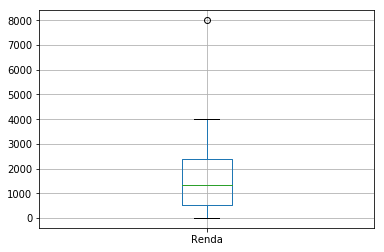

In [53]:
quantils=dados_não_nulos.Renda.quantile(np.arange(0,1,.1))
quantils.plot(kind="box",grid=True)

Retirado a parte que não representa a população (os 10% mais ricos), tem-se uma melhor análise de dados.

Separando a renda em faixas iguais (levado em conta o salário mínimo atual) para podermos obter uma melhor análise:

(0, 937]        27.587719
(937, 1874]     37.456140
(1874, 2811]    14.188596
(2811, 3748]     7.500000
(3748, 4685]     3.881579
(4685, 5622]     4.232456
(5622, 6559]     1.907895
(6559, 7496]     1.206140
(7496, 8433]     1.578947
(8433, 9370]     0.460526
Name: Renda, dtype: float64

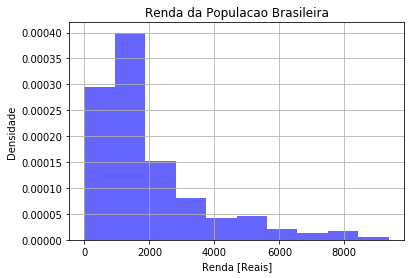

In [54]:
faixa = np.arange(0,10000,937)
salário_min = pd.cut(dados_não_nulos.Renda,faixa)
plot = dados_não_nulos.Renda.plot.hist(bins=faixa,title="Renda da Populacao Brasileira", normed = 1,
                                       color="blue",alpha=0.6)
plt.xlabel("Renda [Reais]")
plt.ylabel("Densidade")
plt.grid(True)
salário_min.value_counts(sort=False, normalize=True)*100

Esse gráfico revela onde está as rendas que melhor representam a população brasileira (entre 0 e 5000 reais), ocupando rendas maiores, é corresponde a uma parcela de pessoas muito pequena. É possível notar ainda que mais de 50% da população está recebendo entre 2 salários mínimos (0 a 2000 reais). 

# Comparando os aspectos socioeconômicos de cada região:

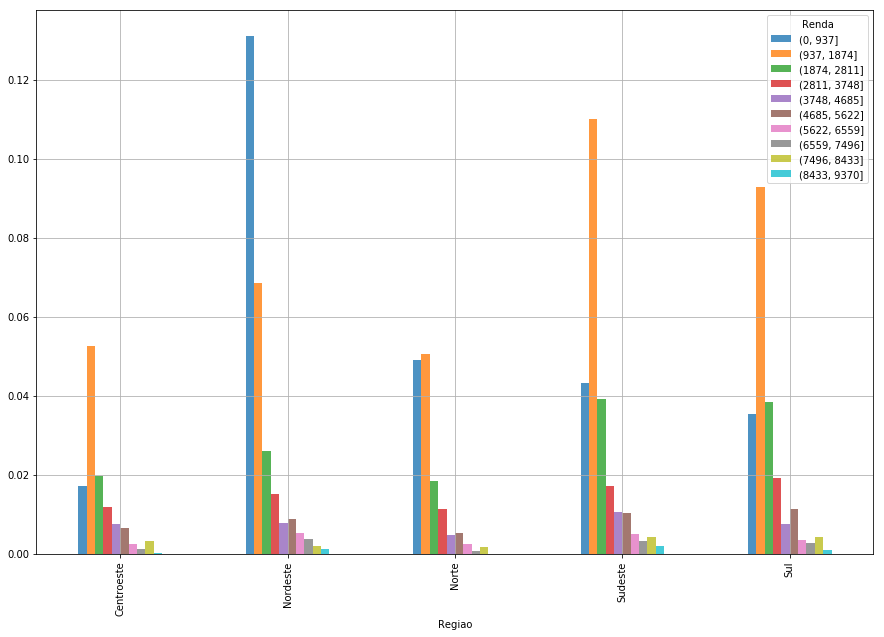

In [55]:
salário_min.value_counts()
sal_Regiao=pd.crosstab(dados_não_nulos["Regiao"],salário_min,normalize = True)
sal_Regiao.plot(kind="bar",figsize=(15,10),alpha=0.8, grid= True)

Fazendo um código em python para visualizar melhor cada região e assim realizar uma análise melhor:

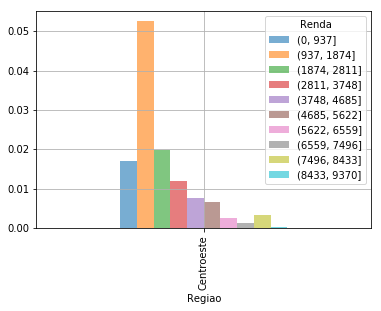

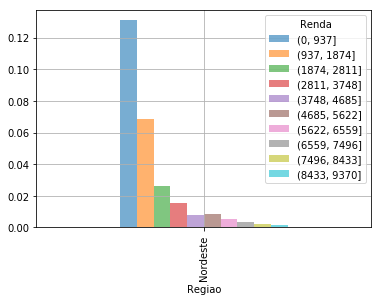

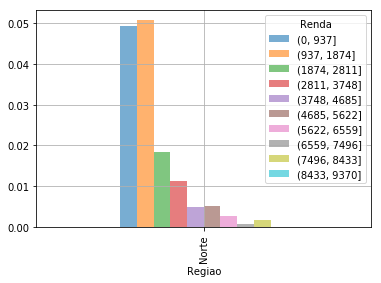

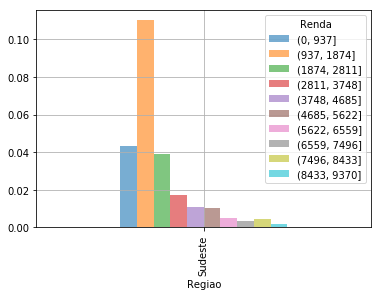

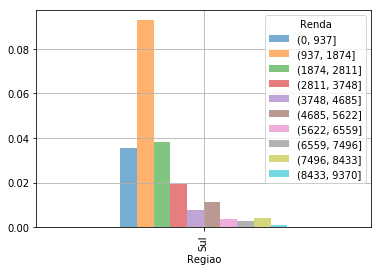

In [56]:
for i in range(5):
    sal_Regiao[i:i+1].plot(kind="bar",grid = True,alpha=0.6)
   

Região Nordeste é ...
Região Norte é ...
Região Sul é ...
Região Centroeste é...
Região Sudeste é ...

# Comparação entre renda (em salários mínimos) com a Utilização de Internet em algum local

In [57]:
salário_min.value_counts()
sal_Utilizou_a_Internet_em_algum_local=pd.crosstab(dados_não_nulos["Utilizou_a_Internet_em_algum_local"],salário_min,normalize = True)
b=sal_Utilizou_a_Internet_em_algum_local.sum().sum()
sal_Utilizou_a_Internet_em_algum_local*100/b



Renda,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
Utilizou_a_Internet_em_algum_local,,,,,,,,,,
Nao,25.701754,27.807018,8.333333,3.486842,1.271930,1.271930,0.460526,0.197368,0.372807,0.087719
Sim,1.885965,9.649123,5.855263,4.013158,2.609649,2.960526,1.447368,1.008772,1.206140,0.372807


A porcentagem de brasileiros que Utilizou a Internet em algum local é de:  66.00916517234509 %


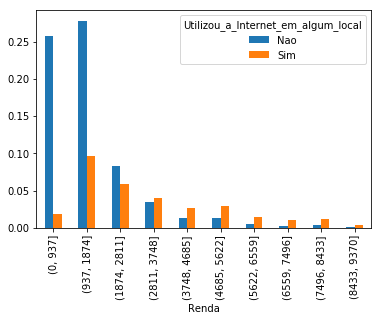

In [58]:
sal_Utilizou_a_Internet_em_algum_local=pd.crosstab(salário_min,dados_não_nulos["Utilizou_a_Internet_em_algum_local"],normalize = True)
sal_Utilizou_a_Internet_em_algum_local.plot(kind="bar")

x=dados_não_nulos["Utilizou_a_Internet_em_algum_local"].value_counts()
b=x.sum()
print("A porcentagem de brasileiros que Utilizou a Internet em algum local é de: ",(100*x[0]/x.sum()),"%")

# Comparação entre renda (em salários mínimos) com posse de Telefone móvel celular para uso pessoal

In [59]:
salário_min.value_counts()
sal_Tem_telefone_móvel_celular_para_uso_pessoal=pd.crosstab(dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"],salário_min,normalize = True)
b=sal_Tem_telefone_móvel_celular_para_uso_pessoal.sum().sum()
sal_Tem_telefone_móvel_celular_para_uso_pessoal*100/b

Renda,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
Tem_telefone_móvel_celular_para_uso_pessoal,,,,,,,,,,
Nao,11.754386,6.25000,1.535088,0.723684,0.197368,0.241228,0.043860,0.043860,0.043860,0.043860
Sim,15.833333,31.20614,12.653509,6.776316,3.684211,3.991228,1.864035,1.162281,1.535088,0.416667


Percebe-se, portanto, que a renda é um potencializador para que as pessoas idosas acessarem ou não a internet. Pelo que se percebe, a partir da análise dessa tabela, quanto maior é a renda, mais pessoas utilizaram a internet em algum local.

A porcentagem de brasileiros que Tem telefone móvel celular para uso pessoal é de:  79.51783223749752 %


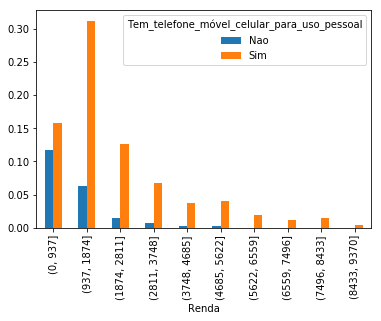

In [60]:
sal_Tem_telefone_móvel_celular_para_uso_pessoal=pd.crosstab(salário_min,dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"],normalize = True)
sal_Tem_telefone_móvel_celular_para_uso_pessoal.plot(kind="bar")

x=dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"].value_counts()
b=x.sum()
print("A porcentagem de brasileiros que Tem telefone móvel celular para uso pessoal é de: ",(100*x[0]/x.sum()),"%")

# Comparando a utilização da internet em algum local com Condição Censitária

Text(0.5,1,'Urbana - Utilizou_a_Internet_em_algum_local')

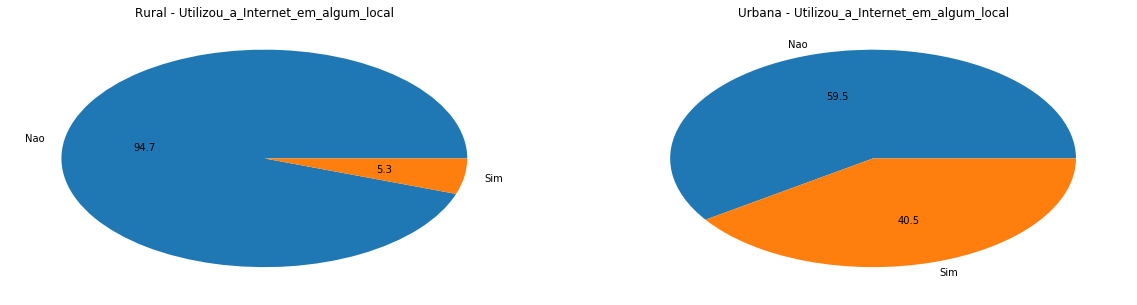

In [61]:
Utilizou_a_Internet_em_algum_local_rural=(dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Rural"].value_counts()

f, axarr = plt.subplots(1,2,figsize=(20,5))
axarr[0].pie(Utilizou_a_Internet_em_algum_local_rural,autopct="%0.1f",labels=Utilizou_a_Internet_em_algum_local_rural.index)
axarr[0].set_title('Rural - Utilizou_a_Internet_em_algum_local')

Utilizou_a_Internet_em_algum_local_urbana=(dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Urbana"].value_counts()

axarr[1].pie(Utilizou_a_Internet_em_algum_local_urbana,autopct="%0.1f",labels=Utilizou_a_Internet_em_algum_local_rural.index)
axarr[1].set_title('Urbana - Utilizou_a_Internet_em_algum_local')



# Comparando a posse de Telefone móvel celular para uso pessoal com a Condição Censitária

Text(0.5,1,'Urbana - Tem_telefone_móvel_celular_para_uso_pessoal')

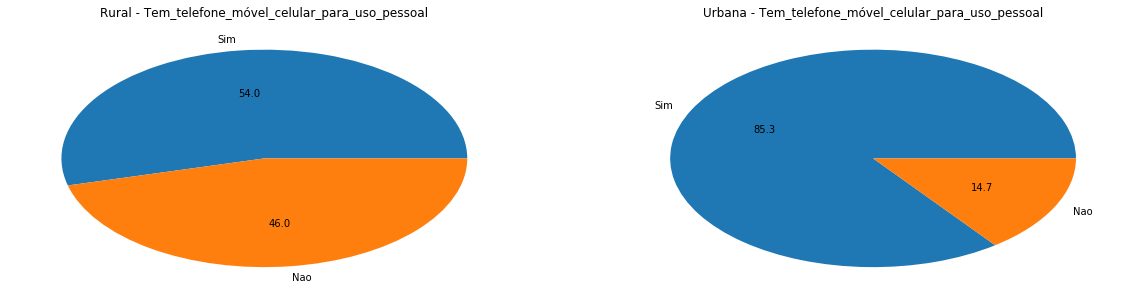

In [62]:
Tem_telefone_móvel_celular_para_uso_pessoal_rural=(dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Rural"].value_counts()

f, axarr = plt.subplots(1,2,figsize=(20,5))
axarr[0].pie(Tem_telefone_móvel_celular_para_uso_pessoal_rural,autopct="%0.1f",labels=Tem_telefone_móvel_celular_para_uso_pessoal_rural.index)
axarr[0].set_title('Rural - Tem_telefone_móvel_celular_para_uso_pessoal')

Tem_telefone_móvel_celular_para_uso_pessoal_urbana=(dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Urbana"].value_counts()

axarr[1].pie(Tem_telefone_móvel_celular_para_uso_pessoal_urbana,autopct="%0.1f",labels=Tem_telefone_móvel_celular_para_uso_pessoal_urbana.index)
axarr[1].set_title('Urbana - Tem_telefone_móvel_celular_para_uso_pessoal')


# Comparando Renda com a Condição Censitária

Análise na Zona Rural

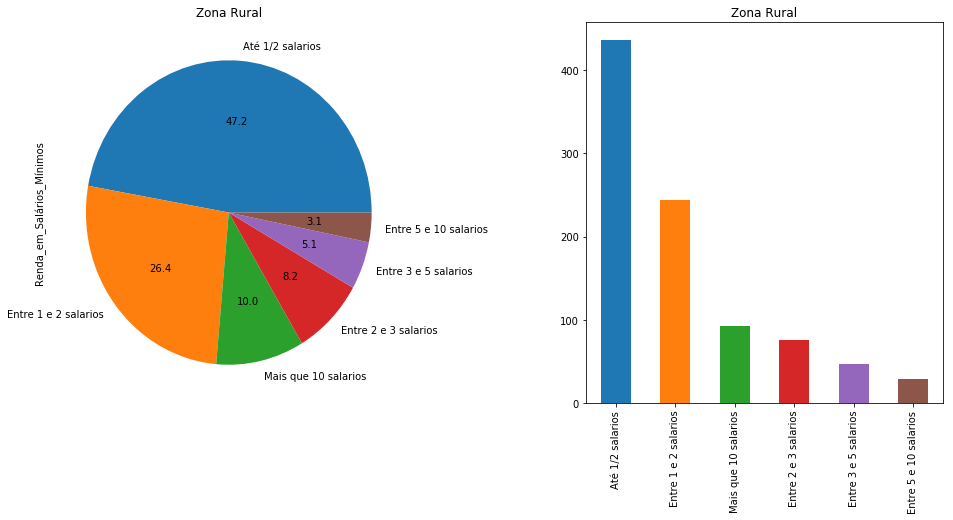

In [63]:
Renda_rural=(dados_não_nulos["Renda_em_Salários_Mínimos"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Rural"].value_counts()
fig = plt.figure(figsize=(16,7))

plt.subplot(122)
plot=Renda_rural.plot(kind="bar", title= "Zona Rural")

plt.subplot(121)
plot=Renda_rural.plot(kind="pie",autopct="%0.1f", title= "Zona Rural")

fig.subplots_adjust(wspace=.5)
plt.show()

Análise na Zona Urbana

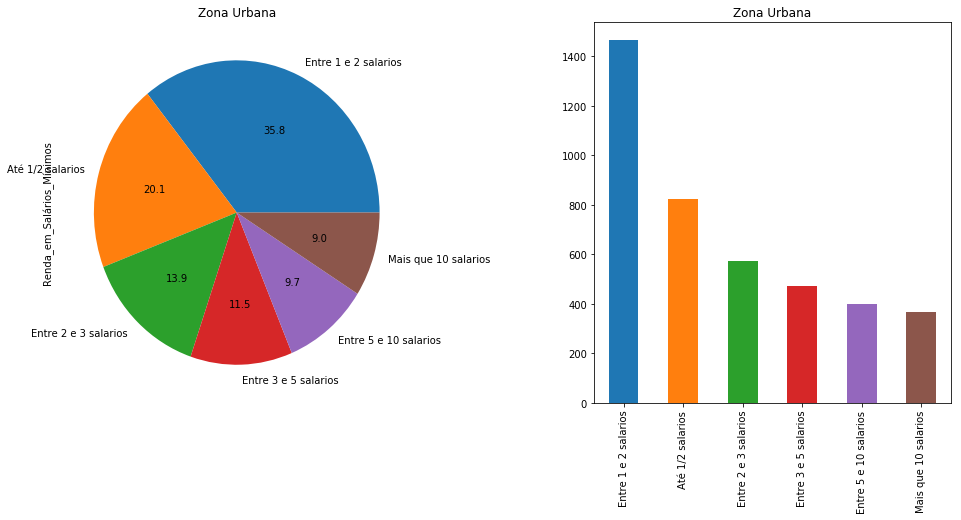

In [64]:
Renda_urbana=(dados_não_nulos["Renda_em_Salários_Mínimos"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Urbana"].value_counts()
fig = plt.figure(figsize=(16,7))

plt.subplot(122)
plot=Renda_urbana.plot(kind="bar", title= "Zona Urbana")

plt.subplot(121)
plot=Renda_urbana.plot(kind="pie",autopct="%0.1f", title= "Zona Urbana")

fig.subplots_adjust(wspace=.5)
plt.show()

# Região Norte:

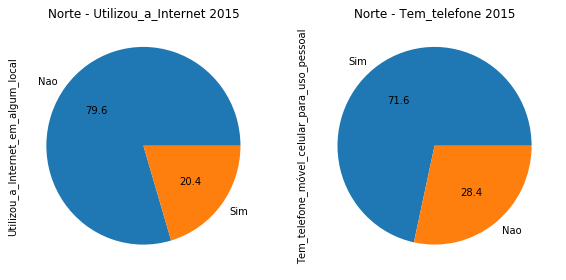

In [84]:
Região_Norte_2015=dados_não_nulos[dados_não_nulos.Regiao=="Norte"]
Utilizou_a_Internet_em_algum_local_Região_Norte= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Norte"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Norte= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Norte"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Norte.plot(kind="pie", autopct="%0.1f",title= 'Norte - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Norte.plot(kind="pie",autopct="%0.1f", title= 'Norte - Tem_telefone 2015')

plt.show()

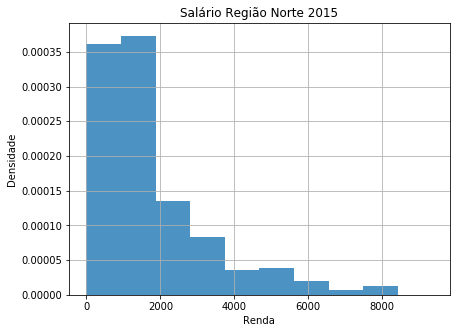

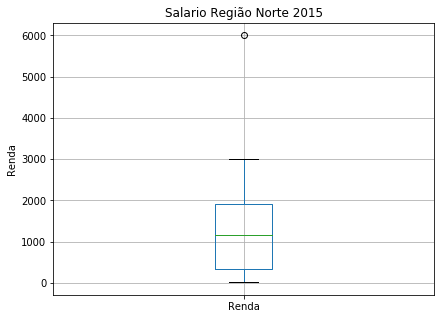

In [85]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Norte_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Norte 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Norte_2015 = Região_Norte_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Norte_2015.plot(kind="box",grid=True)
plt.title("Salario Região Norte 2015")
plt.ylabel("Renda")

plt.show()

# Região Nordeste:

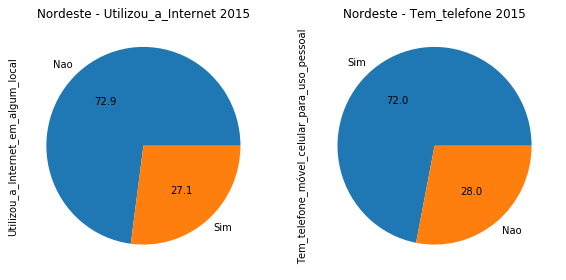

In [86]:
Região_Nordeste_2015=dados_não_nulos[dados_não_nulos.Regiao=="Nordeste"]
Utilizou_a_Internet_em_algum_local_Região_Nordeste= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Nordeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Nordeste= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Nordeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(243)
plot=Utilizou_a_Internet_em_algum_local_Região_Nordeste.plot(kind="pie", autopct="%0.1f",title= 'Nordeste - Utilizou_a_Internet 2015')

plt.subplot(244)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Nordeste.plot(kind="pie",autopct="%0.1f", title= 'Nordeste - Tem_telefone 2015')

plt.show()

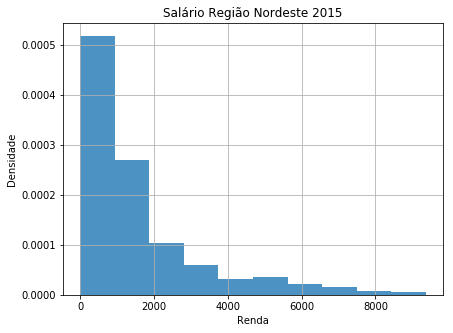

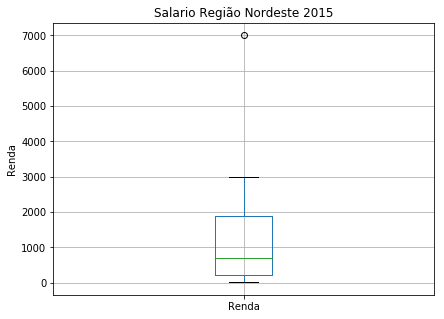

In [87]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Nordeste_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Nordeste 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Nordeste_2015 = Região_Nordeste_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Nordeste_2015.plot(kind="box",grid=True)
plt.title("Salario Região Nordeste 2015")
plt.ylabel("Renda")

plt.show()

# Região Centroeste:

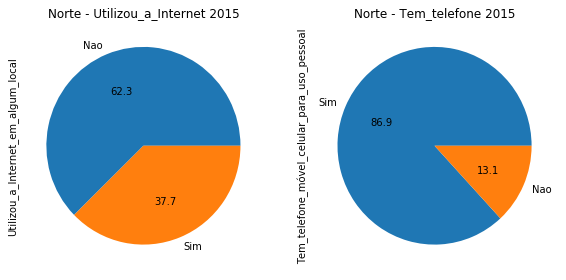

In [88]:
Região_Centroeste_2015=dados_não_nulos[dados_não_nulos.Regiao=="Centroeste"]
Utilizou_a_Internet_em_algum_local_Região_Centroeste= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Centroeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Centroeste= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Centroeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Centroeste.plot(kind="pie", autopct="%0.1f",title= 'Norte - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Centroeste.plot(kind="pie",autopct="%0.1f", title= 'Norte - Tem_telefone 2015')

plt.show()

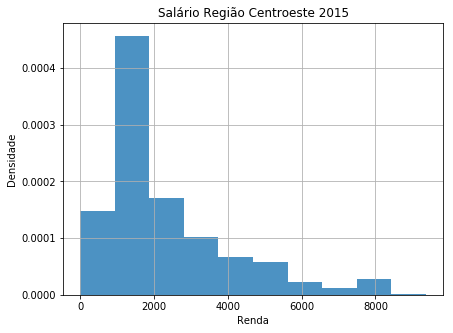

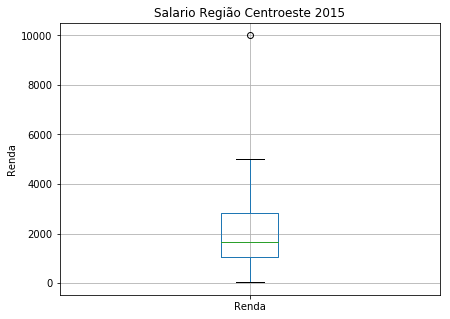

In [89]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Centroeste_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Centroeste 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Centroeste_2015 = Região_Centroeste_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Centroeste_2015.plot(kind="box",grid=True)
plt.title("Salario Região Centroeste 2015")
plt.ylabel("Renda")

plt.show()

# Região Sul:

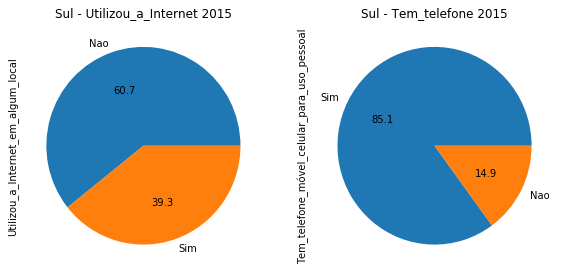

In [92]:
Região_Sul_2015=dados_não_nulos[dados_não_nulos.Regiao=="Sul"]
Utilizou_a_Internet_em_algum_local_Região_Sul= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Sul"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sul= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Sul"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Sul.plot(kind="pie", autopct="%0.1f",title= 'Sul - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sul.plot(kind="pie",autopct="%0.1f", title= 'Sul - Tem_telefone 2015')

plt.show()

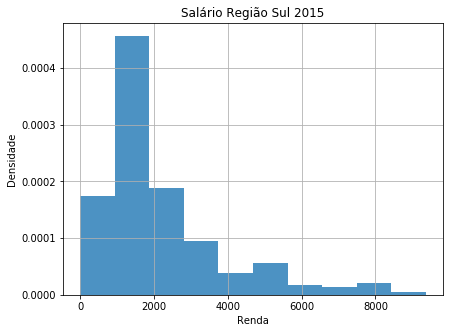

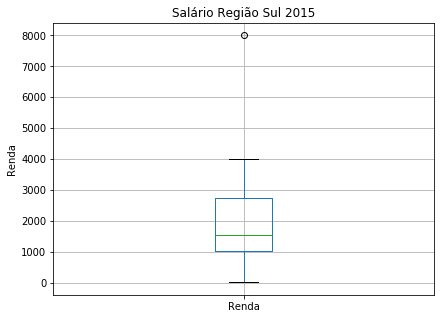

In [95]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Sul_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Sul 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Sul_2015 = Região_Sul_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Sul_2015.plot(kind="box",grid=True)
plt.title("Salário Região Sul 2015")
plt.ylabel("Renda")

plt.show()

# Região Sudeste:

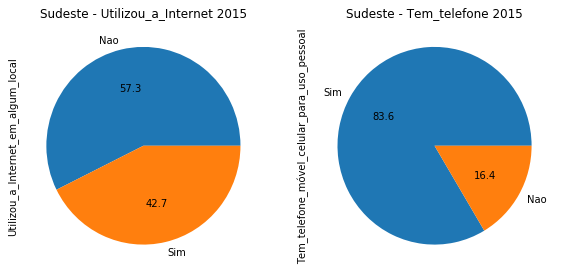

In [96]:
Região_Sudeste_2015=dados_não_nulos[dados_não_nulos.Regiao=="Sudeste"]
Utilizou_a_Internet_em_algum_local_Região_Sudeste= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Sudeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sudeste= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Sudeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Sudeste.plot(kind="pie", autopct="%0.1f",title= 'Sudeste - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sudeste.plot(kind="pie",autopct="%0.1f", title= 'Sudeste - Tem_telefone 2015')

plt.show()

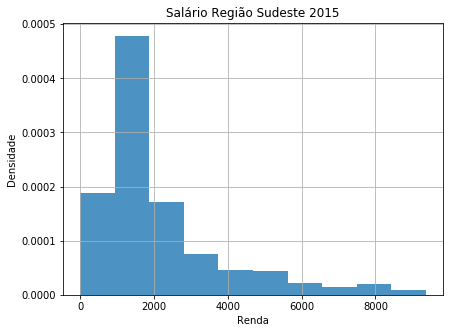

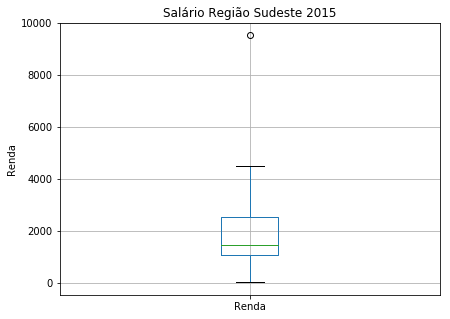

In [97]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Sudeste_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Sudeste 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Sudeste_2015 = Região_Sudeste_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Sudeste_2015.plot(kind="box",grid=True)
plt.title("Salário Região Sudeste 2015")
plt.ylabel("Renda")

plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!